In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from google.colab import drive

In [3]:
# Step 1: Extract the image data
drive.mount('/content/drive')
df_colon = pd.read_pickle('/content/colon_df.pkl')

Mounted at /content/drive


In [4]:
# Convert the image data to NumPy arrays
image_data = np.array(df_colon['image'].tolist())

# Normalize the pixel values to range between 0 and 1
image_data = (image_data / 255.0) - 0.5

# Reshape the image data to have a single color channel (assuming it's RGB)
image_data = image_data.reshape(image_data.shape[0], image_data.shape[1], image_data.shape[2], 3)


In [5]:
# Step 3: Extract labels

# Convert the labels to numerical values
labels = df_colon['label']


In [6]:
# Step 4: Split the data into training and testing sets

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    image_data, labels, test_size=0.2, random_state=42
)

In [7]:
# Step 5: Build the CNN model
model = keras.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(image_data.shape[1], image_data.shape[2], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [8]:
# Step 6: Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
250/250 [==============================] - 14s 7ms/step - loss: 0.4843 - accuracy: 0.7594 - val_loss: 0.3494 - val_accuracy: 0.8390
Epoch 2/20
250/250 [==============================] - 1s 6ms/step - loss: 0.2940 - accuracy: 0.8717 - val_loss: 0.2220 - val_accuracy: 0.9075
Epoch 3/20
250/250 [==============================] - 1s 6ms/step - loss: 0.2103 - accuracy: 0.9099 - val_loss: 0.2293 - val_accuracy: 0.9000
Epoch 4/20
250/250 [==============================] - 1s 5ms/step - loss: 0.1775 - accuracy: 0.9225 - val_loss: 0.1442 - val_accuracy: 0.9510
Epoch 5/20
250/250 [==============================] - 1s 5ms/step - loss: 0.1518 - accuracy: 0.9366 - val_loss: 0.1430 - val_accuracy: 0.9500
Epoch 6/20
250/250 [==============================] - 1s 5ms/step - loss: 0.1178 - accuracy: 0.9549 - val_loss: 0.1118 - val_accuracy: 0.9645
Epoch 7/20
250/250 [==============================] - 1s 5ms/step - loss: 0.1037 - accuracy: 0.9604 - val_loss: 0.1244 - val_accuracy: 0.9525
Epoch

63/63 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 0.9585
Test loss: 0.11615389585494995
Test accuracy: 0.9585000276565552
63/63 [==============================] - 0s 2ms/step
Accuracy: 0.9585
Confusion Matrix:
[[998  14]
 [ 69 919]]
Sensitivity/Recall: 0.930161943319838
Specificity: 0.9861660079051383
Precision: 0.984994640943194
Negative Predictive Value: 0.9353327085285849
F1 Score: 0.9567933368037481
Matthews Correlation Coefficient: 0.9183254731291014
Recall: 0.930161943319838


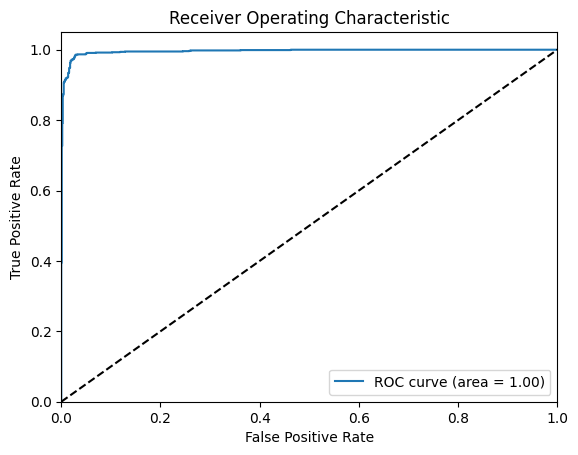

In [9]:
# Step 7: Evaluate the model

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

# Calculate additional metrics
predictions = model.predict(test_images)

# Apply threshold to obtain binary predictions
threshold = 0.5
binary_predictions = np.where(predictions >= threshold, 1, 0)

# Accuracy
accuracy = accuracy_score(test_labels, binary_predictions)
print(f'Accuracy: {accuracy}')

# Confusion matrix
confusion = confusion_matrix(test_labels, binary_predictions)
print("Confusion Matrix:")
print(confusion)

# True positive (TP), true negative (TN), false positive (FP), false negative (FN)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)
sensitivity = TP / (TP + FN)
print(f'Sensitivity/Recall: {sensitivity}')

# Specificity or True Negative Rate (TNR)
specificity = TN / (TN + FP)
print(f'Specificity: {specificity}')

# Precision or Positive Predictive Value (PPV)
precision = TP / (TP + FP)
print(f'Precision: {precision}')

# Negative Predictive Value (NPV)
npv = TN / (TN + FN)
print(f'Negative Predictive Value: {npv}')

# F1 Score (Harmonic mean of precision and recall)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
print(f'F1 Score: {f1_score}')

# Matthews Correlation Coefficient (MCC)
mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
print(f'Matthews Correlation Coefficient: {mcc}')

# Recall
recall = sensitivity
print(f'Recall: {recall}')

# Receiver Operating Characteristic (ROC) Curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

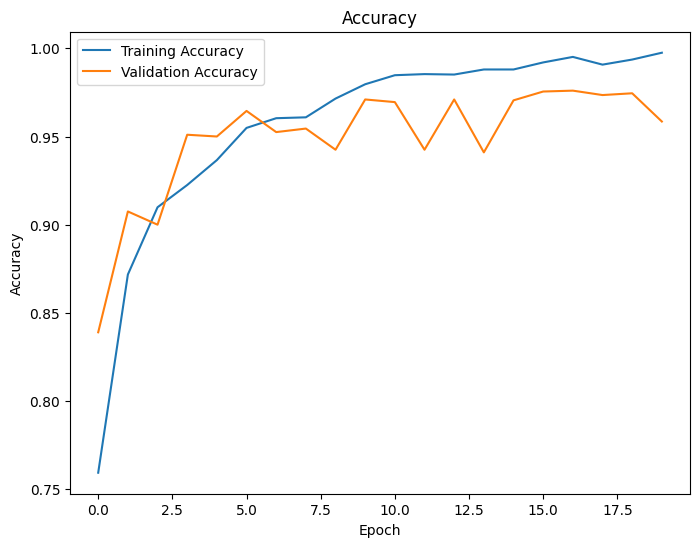

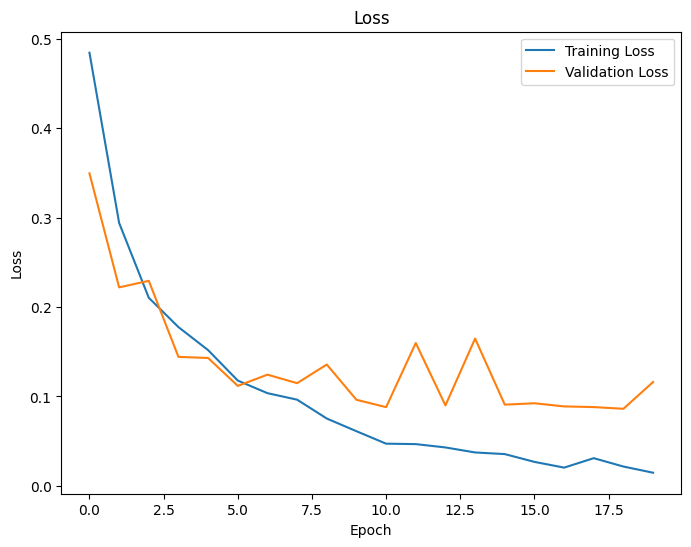

In [10]:
# Step 8: Plot accuracy and loss curves

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Guardar el modelo
model.save('./sample_data/colon_model.h5')